# Sloan Sky Digital Survey - Classification model for stellar objects based on SDSS data 



<b>Author:</b> Priyadharsshini Sakrapani

In [1]:
# Import necessary Libraries
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the dataset
df = pd.read_csv('Skyserver_SQL2_27_2018 6_51_39 PM.csv', skiprows=0)
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


### DATA PREPROCESSING AND EXPLORATORY DATA ANALYSIS

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


This is a pandas DataFrame with 10,000 rows and 18 columns. Here's a brief description of the columns:

<b>objid:</b> Object identifier<br>
<b>ra:</b> Right ascension coordinate<br>
<b>dec:</b> Declination coordinate<br>
<b>u, g, r, i, z:</b> Magnitudes in different wavelength bands<br>
<b>run:</b> Run number<br>
<b>rerun:</b> Re-run number<br>
<b>camcol:</b> Camera column<br>
<b>field:</b> Field number<br>
<b>specobjid:</b> Spectroscopic object identifier<br>
<b>class:</b> Object class (galaxy, star, quasar)<br>
<b>redshift:</b> Redshift of the object<br>
<b>plate:</b> Plate number<br>
<b>mjd:</b> Modified Julian Date<br>
<b>fiberid:</b> Fiber ID<br>
<b>Most columns have a numerical data type (either float64 or int64), except for the 'class' column which is of type object.</b> <br>
    
<b>There are no missing values in any of the columns. </b>

In [4]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Remove missing values
df.dropna(inplace=True)

# Convert categorical variables to numerical using one-hot encoding
df['class'] = df['class'].map({'GALAXY': 0, 'STAR': 1, 'QSO': 2})
df.head(5)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,1,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,1,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,1,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,1,0.000590,3306,54922,512


In [5]:
# Remove unnecessary columns
df.drop(['objid', 'run', 'rerun', 'camcol', 'field', 'specobjid'], axis=1, inplace=True)

objid and specobjid are just identifiers for accessing the rows back when they were stored in the original databank. Therefore we will not need them for classification as they are not related to the outcome.

Similarly, the features 'run', 'rerun', 'camcol' and 'field' are values which describe parts of the camera at the moment when making the observation, e.g. 'run' represents the corresponding scan which captured the oject.

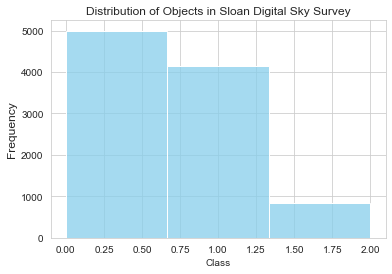

Class Counts:
0    4998
1    4152
2     850
Name: class, dtype: int64


In [6]:
# Plot the class distribution
sns.set_style("whitegrid")
sns.histplot(df['class'], bins=3, color='skyblue')
plt.title('Distribution of Objects in Sloan Digital Sky Survey')
plt.xlabel('Class')
plt.ylabel('Frequency', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

# Print the class counts
class_counts = df['class'].value_counts()
print(f"Class Counts:\n{class_counts}")

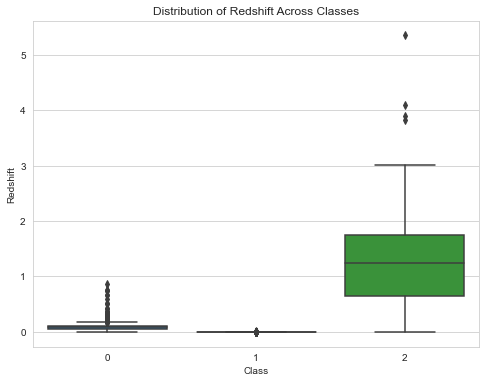

        count      mean       std       min       25%       50%       75%  \
class                                                                       
0      4998.0  0.080325  0.046036 -0.000513  0.051216  0.077330  0.101164   
1      4152.0  0.000043  0.000410 -0.004136 -0.000133  0.000024  0.000218   
2       850.0  1.218366  0.697699  0.000461  0.651192  1.234131  1.744641   

            max  
class            
0      0.855881  
1      0.004563  
2      5.353854  


In [7]:
# Plot the distribution of the redshift feature across the classes
plt.figure(figsize=(8,6))
sns.boxplot(x='class', y='redshift', data=df, showfliers=True)
plt.title('Distribution of Redshift Across Classes')
plt.xlabel('Class')
plt.ylabel('Redshift')
plt.show()

# Print numerical values
print(df.groupby('class')['redshift'].describe())


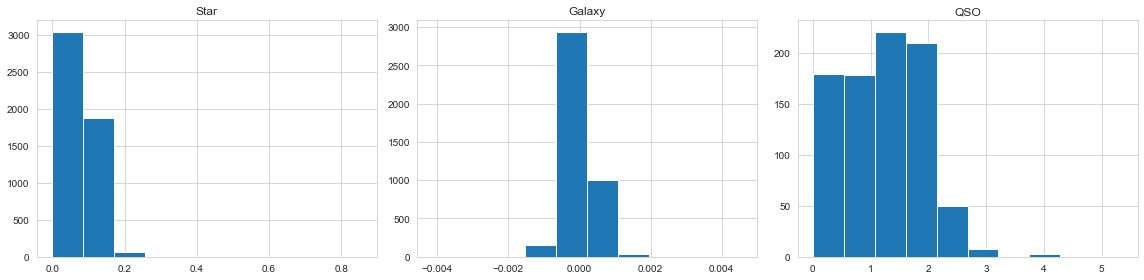

In [8]:
# Plot class distribution
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
ax0, ax1, ax2 = axes.flatten()

n_bins = 10
x = df[df['class']==0].redshift
y = df[df['class']==1].redshift
z = df[df['class']==2].redshift

ax0.hist(x, bins = n_bins)
ax0.set_title('Star')

ax1.hist(y, bins = n_bins)
ax1.set_title('Galaxy')

ax2.hist(z, bins = n_bins)
ax2.set_title('QSO')

fig.tight_layout()
plt.show()


In [9]:
# Compute Mean and Standard deviation of redshift 
print('Mean of redshift for each class:')
print(df.groupby('class')['redshift'].mean())
print('Standard deviation of redshift for each class:')
print(df.groupby('class')['redshift'].std())

Mean of redshift for each class:
class
0    0.080325
1    0.000043
2    1.218366
Name: redshift, dtype: float64
Standard deviation of redshift for each class:
class
0    0.046036
1    0.000410
2    0.697699
Name: redshift, dtype: float64


### EXPERIMENTS

In [10]:
# Scale the data
scaler_gnb = MaxAbsScaler()
sdss = scaler_gnb.fit_transform(df.drop('class', axis=1))
X = df.drop(columns=['class'])
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate the classifiers
classifiers = [KNeighborsClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=10), SVC()]
results = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Time', 'Prediction Time'])

for clf in classifiers:
    # Train the classifier and measure the training time
    training_start = time.perf_counter()
    clf.fit(X_train, y_train)
    training_end = time.perf_counter()
    training_time = training_end - training_start
    
    # Make predictions and measure the prediction time
    prediction_start = time.perf_counter()
    y_pred = clf.predict(X_test)
    prediction_end = time.perf_counter()
    prediction_time = prediction_end - prediction_start
    
    # Calculate evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    if isinstance(clf, RandomForestClassifier):        
        random_accuracy = acc
        random_precision = precision
        random_recall = recall
        random_f1 = f1
    
    # Store the results
    results.loc[type(clf).__name__] = [acc, precision, recall, f1, training_time, prediction_time]

# Print the results
print("random_accuracy:", random_accuracy)
print("random_precision:", random_precision)
print("random_recall:", random_recall)
print("random_f1:", random_f1)
print(results)


random_accuracy: 0.9885
random_precision: 0.9884361160430942
random_recall: 0.9885
random_f1: 0.9884325643739929
                        Accuracy  Precision  Recall  F1-Score  Training Time  \
KNeighborsClassifier      0.7795   0.751023  0.7795  0.744830       0.007383   
GaussianNB                0.8450   0.855354  0.8450  0.842535       0.004178   
RandomForestClassifier    0.9885   0.988436  0.9885  0.988433       0.156622   
SVC                       0.7815   0.728190  0.7815  0.740835       2.594693   

                        Prediction Time  
KNeighborsClassifier           0.062442  
GaussianNB                     0.001860  
RandomForestClassifier         0.005195  
SVC                            1.015518  


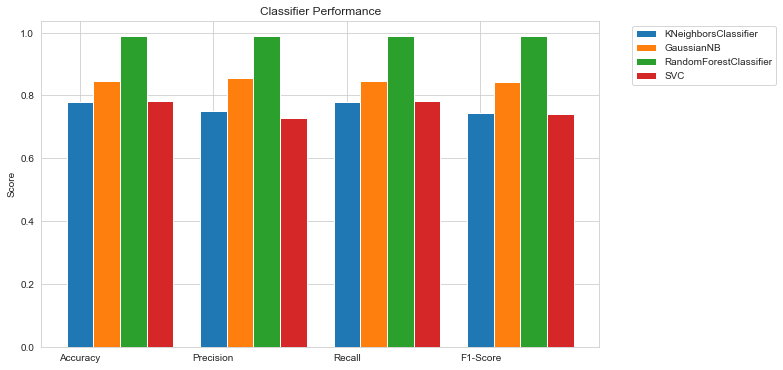

In [11]:
# Create a bar chart of the evaluation metrics for each classifier
fig, ax = plt.subplots(figsize=(10, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics))
width = 0.2
for i, clf in enumerate(classifiers):
    scores = results.loc[type(clf).__name__][:-2].values
    ax.bar(x + i*width, scores, width, label=type(clf).__name__)
    
ax.set_ylabel('Score')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_title('Classifier Performance')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [12]:
# Perform hyper parameter tunining for the best model found from the previous step
# Scale the data
scaler_gnb = MaxAbsScaler()
sdss = scaler_gnb.fit_transform(df.drop('class', axis=1))
X = df.drop(columns=['class'])
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create Random Forest Classifier and perform Grid Search to find the best hyperparameters
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc, param_grid, cv=5, n_jobs=-1)
clf.fit(X_train, y_train)

# Train the classifier with the best hyperparameters found by Grid Search and measure the training time
training_start = time.perf_counter()
clf_best = clf.best_estimator_
clf_best.fit(X_train, y_train)
training_end = time.perf_counter()
training_time = training_end - training_start

# Make predictions and measure the prediction time
prediction_start = time.perf_counter()
y_pred = clf_best.predict(X_test)
prediction_end = time.perf_counter()
prediction_time = prediction_end - prediction_start

# Calculate evaluation metrics
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Best hyperparameters:", clf.best_params_)
print("Accuracy:", acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Training Time:", training_time)
print("Prediction Time:", prediction_time)


Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy: 0.99
Precision: 0.9899584614980151
Recall: 0.99
F1-Score: 0.9899664424280351
Training Time: 0.750471233999999
Prediction Time: 0.017206375000000662


In [13]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[986   5   5]
 [  1 813   0]
 [  9   0 181]]


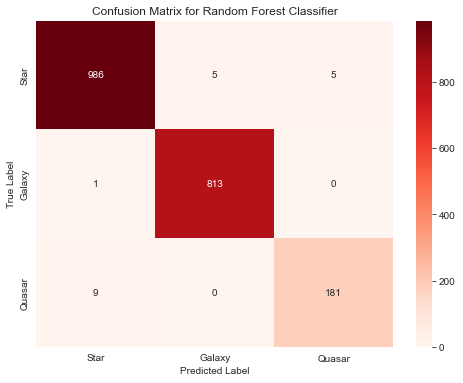

In [14]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
classes = ['Star', 'Galaxy', 'Quasar']

# Plot confusion matrix as heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


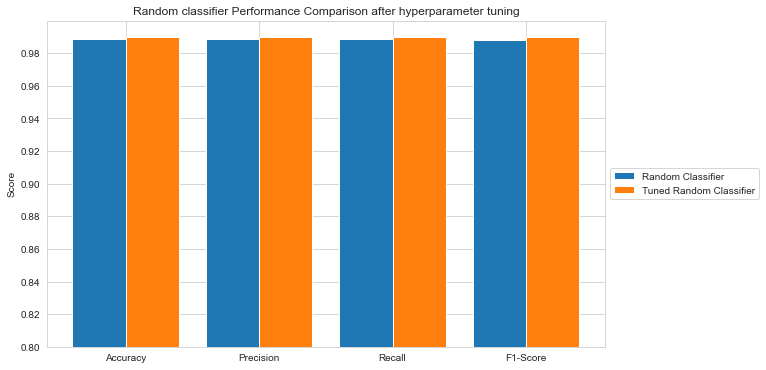

In [15]:
# Create a bar chart of the evaluation metrics for the random classifier and hyper parameter tuned random classifier
fig, ax = plt.subplots(figsize=(10, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics))
width = 0.4
random_scores = [random_accuracy, random_precision, random_recall, random_f1]
tuned_scores = [acc, precision, recall, f1]
ax.bar(x - width/2, random_scores, width, label='Random Classifier')
ax.bar(x + width/2, tuned_scores, width, label='Tuned Random Classifier')


ax.set_ylim([0.8, 1.0])
ax.set_yticks(np.arange(0.8, 1.0, 0.02))
ax.set_ylabel('Score')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_title('Random classifier Performance Comparison after hyperparameter tuning')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
